# telluric: manipulaci√≥n interactiva de datos geoespaciales en Jupyter con Python

## Juan Luis Cano - 2018-06-07 @ Jornadas de SIG Libre

https://github.com/satellogic/telluric-talks

![telluric](img/bg.png)

1. Introducci√≥n (3 minutos)
2. Software existente (5 minutos)
  - GDAL, GEOS
  - rasterio, Fiona, Shapely
  - Aun as√≠, demasiado bajo nivel
3. telluric library (5 minutos)
  - Manipulaci√≥n sencilla de geometr√≠as
  - Colecci√≥n de "features"
  - Entrada y salida
  - Datos raster
4. Computaci√≥n distribuida (1 minuto)
5. Trabajo futuro (1 minuto)
6. Slide final y Preguntas


telluric: manipulaci√≥n interactiva de datos geoespaciales en Jupyter con Python
Lucio Torre, Juan Luis Cano, Ariel Zeharia, Guy Doulberg (Satellogic)

Existen diversas bibliotecas Python para manipulaci√≥n de datos geoespaciales, tanto vectores como rasters. La mayor√≠a de estas bibliotecas proveen una interfaz de alto nivel sobre alg√∫n software geoespacial ya existente, simplificando algunas tareas y facilitando su uso. Es el caso de pyproj con PROJ.4, Fiona con el proyecto OGR, Shapely con GEOS, o rasterio con GDAL. Sin embargo, la filosof√≠a minimalista de estos proyectos hace que determinados an√°lisis geoespaciales a√∫n requieran cierto trabajo manual: por ejemplo, combinando Fiona, Shapely y pyproj para leer, manipular y reproyectar datos vectoriales, o rasterio, Shapely y affine para manipular y recortar im√°genes raster. Por otra parte, a la hora de acceder a fuentes de datos externas (im√°genes LANDSAT, Sentinel, etc.) o interactuar con sistemas de almacenamiento en la nube (Amazon S3, Azure Cloud Storage), hace falta recurrir a herramientas de terceros, que son heterog√©neas y no ofrecen una interfaz unificada.

telluric es una biblioteca open source desarrollada por Satellogic en lenguaje Python para manipulaci√≥n interactiva de datos geoespaciales que combina todos los proyectos anteriores para ofrecer una experiencia a√∫n m√°s intuitiva, pensada para ser usada en Jupyter notebook o JupyterLab. Todas las operaciones de telluric gestionan el sistema de proyecci√≥n de manera autom√°tica, eliminando la necesidad de hacerlo manualmente; los objetos se muestran de manera inmediata en la interfaz web sobre un mapa interactivo, y soporta todos los formatos vector y raster en el mundo GIS. Adem√°s, telluric permite crear un repositorio centralizado de acceso a los datos, especificando diversas fuentes externas que se pueden leer de manera homog√©nea.

En esta comunicaci√≥n detallaremos c√≥mo utilizar telluric para manipular datos geoespaciales, c√≥mo se integra en el ecosistema Python y GIS, explicaremos c√≥mo Satellogic utiliza telluric internamente para diferentes tareas (gesti√≥n de datos geoespaciales, an√°lisis de cobertura para constelaciones satelitales, visualizaci√≥n) y comentaremos las l√≠neas de trabajo a futuro. 

# 1. Introducci√≥n

## Sobre Satellogic üåç

* Estamos construyendo una constelaci√≥n de sat√©lites de observaci√≥n de la Tierra
* Estamos creando infraestructura para recopilar y almacenar datos (fundamentalmente im√°genes) de esta constelaci√≥n
* Estamos extrayendo informaci√≥n de estos datos as√≠ como de fuentes externas
* ¬°Estamos contratando!

https://www.satellogic.com/

![Satellogic](img/constellation.png)

## Sobre m√≠

* Ingeniero Aeron√°utico especializado en mec√°nica orbital üõ∞
* Socio fundador y presidente de la asociaci√≥n sin √°nimo de lucro **Python Espa√±a** y organizador de la **PyConES** üêç
  - Pr√≥xima edici√≥n en M√°laga, la llamada a propuestas cierra ma√±ana https://2018.es.pycon.org/
* **Software Engineer** en el equipo encargado de recopilar, almacenar y acceder a datos geoespaciales en **Satellogic** üåç
* Defensor del Software Libre y entusiasta de Python para ciencia e ingenier√≠a

![Juan Luis Cano](img/juanlu_esa.jpg)

# 2. Software existente

* **Python** es un lenguaje de programaci√≥n de prop√≥sito general con presencia en el mundo GIS
* Adem√°s de lenguaje de scripting (QGIS, ArcGIS) existe un ecosistema de bibliotecas para uso geoespacial
* Acceso a bases de datos geoespaciales, entrada/salida, procesamiento, visualizaci√≥n...
* Sin embargo, este ecosistema es un poco complicado de descifrar:

![Landscape](img/landscape.png)

Resumen de proyectos clave:

| Python   |   | C/C++  |
|----------|---|--------|
| pyproj   | ‚áí | PROJ.4 |
| Fiona    | ‚áí | OGR    |
| Shapely  | ‚áí | GEOS   |
| rasterio | ‚áí | GDAL   |

**Ventajas**:

* API "pythonica"
* "Filosof√≠a UNIX" (hacer una sola cosa y hacerla bien)
* Bibliotecas con un alcance espec√≠fico, ligeras y reutilizables

**Desventajas**:

* La integraci√≥n corre a cargo del usuario
* El manejo de proyecciones, en algunos casos, tambi√©n

# 3. telluric

_telluric is an open source (MIT) Python library to manage vector and raster geospatial data in an interactive and easy way._

* Operaciones geom√©tricas que respetan las proyecciones
* Entrada y salida sencillas para datos raster y vectoriales
* Visualizaci√≥n interactiva
* üïÆ Documentaci√≥n http://telluric.readthedocs.io/
* üîß C√≥digo fuente https://github.com/satellogic/telluric

Importar para uso interactivo:

In [1]:
import telluric as tl
from telluric.constants import WGS84_CRS, WEB_MERCATOR_CRS

Basic geometry definition using `GeoVector`: in the simplest case, the bounds and the projection (CRS)

In [2]:
ebro = tl.GeoVector.from_bounds(
    xmin=0, ymin=40, xmax=1, ymax=41, crs=WGS84_CRS
)
print(ebro)

GeoVector(shape=POLYGON ((0 40, 0 41, 1 41, 1 40, 0 40)), crs=CRS({'init': 'epsg:4326'}))


/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


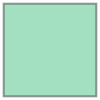

In [3]:
ebro

Tambi√©n se pueden usar geometr√≠as de Shapely:

/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


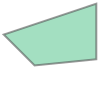

In [4]:
from shapely.geometry import Polygon

ebro2 = tl.GeoVector(
    Polygon([(0, 40), (1, 40.1), (1, 41), (-0.5, 40.5), (0, 40)]),
    WGS84_CRS
)
ebro2

### Propiedades geom√©tricas

/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


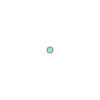

In [5]:
ebro.centroid

In [6]:
ebro.area  # Real area in square meters

9422706289.175217

### Relaciones geom√©tricas

In [7]:
ebro.within(ebro2)

False

In [8]:
print(ebro.difference(ebro2))

GeoVector(shape=MULTIPOLYGON (((0 40.66666666666666, 0 41, 1 41, 0 40.66666666666666)), ((1 40.1, 1 40, 0 40, 1 40.1))), crs=CRS({'init': 'epsg:4326'}))


/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


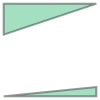

In [9]:
ebro.difference(ebro2)

* Features: `GeoVector` + atributos
* `FeatureCollection`s: una secuencia de features

In [10]:
gf1 = tl.GeoFeature(
    ebro,
    {'name': 'Delta del Ebro'}
)
gf2 = tl.GeoFeature(
    ebro2,
    {'name': 'Delta del Ebro + Castell√≥n'}
)
print(gf1)
print(gf2)

GeoFeature(Polygon, {'name': 'Delta del Ebro'})
GeoFeature(Polygon, {'name': 'Delta del Ebro + Castell√≥n'})


In [11]:
fc = tl.FeatureCollection([gf1, gf2])
fc

/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


## Datos raster

In [12]:
# This will only save the URL in memory
rs = tl.GeoRaster2.open(
    "https://github.com/mapbox/rasterio/raw/master/tests/data/rgb_deflate.tif"
)

# These calls will fetch some GeoTIFF metadata
# without reading the whole image
print(rs.crs)
print(rs.band_names)

CRS({'init': 'epsg:32618'})
[0, 1, 2]


/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


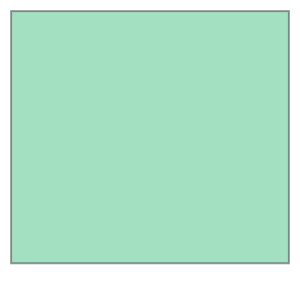

In [13]:
rs.footprint()  # Bounding box

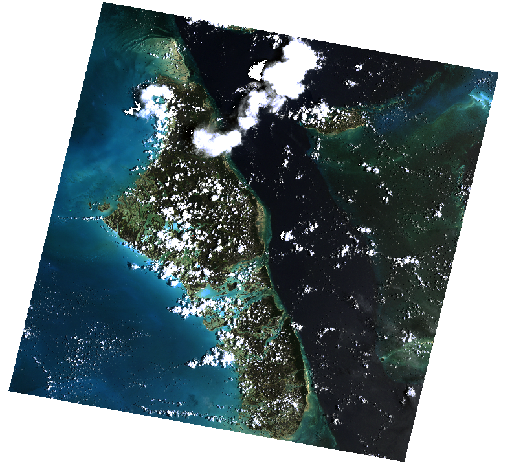

In [14]:
rs

In [15]:
rs.image[:,200:300, 200:240]

masked_array(
  data=[[[15, 20, 23, ..., 41, 38, 29],
         [17, 15, 23, ..., 41, 46, 46],
         [18, 17, 17, ..., 39, 39, 44],
         ...,
         [106, 49, 62, ..., 46, 58, 50],
         [255, 255, 255, ..., 38, 37, 43],
         [255, 229, 255, ..., 40, 31, 35]],

        [[94, 98, 100, ..., 129, 98, 62],
         [98, 96, 100, ..., 127, 127, 133],
         [98, 96, 94, ..., 126, 126, 129],
         ...,
         [145, 79, 116, ..., 47, 58, 51],
         [255, 255, 255, ..., 43, 41, 45],
         [255, 249, 255, ..., 41, 33, 37]],

        [[131, 131, 131, ..., 161, 125, 86],
         [133, 133, 135, ..., 164, 160, 161],
         [133, 132, 129, ..., 159, 160, 157],
         ...,
         [141, 77, 108, ..., 29, 34, 31],
         [255, 255, 255, ..., 31, 30, 31],
         [255, 255, 255, ..., 23, 19, 27]]],
  mask=[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, Fal

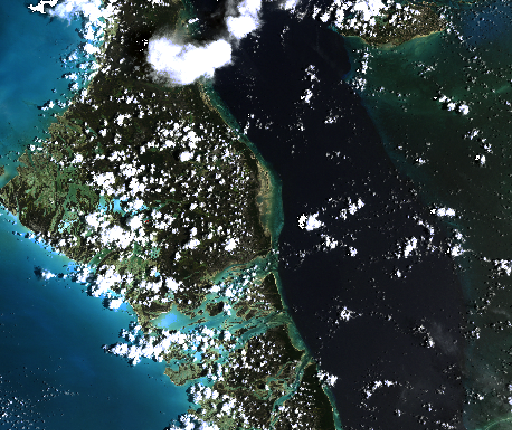

In [16]:
# Crop fetch only the data required to build the raster
rs.crop(rs.footprint().buffer(-50000))

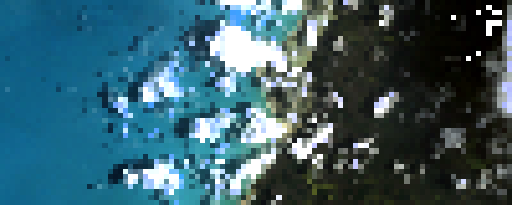

In [17]:
rs[200:300, 200:240] # the image is streched due to the presentation layer

In [18]:
# Rasterizing Vectors
# Geting OpenStreetMap data of Tel Aviv
fc = tl.FileCollection.open("data/telaviv.geojson")
fc

/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


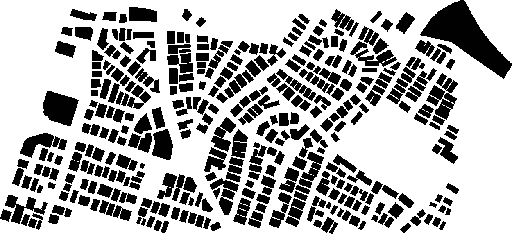

In [19]:
streets_raster = fc.rasterize(dest_resolution=1)
streets_raster

## Computaci√≥n distribuida

* Podemos usar `.crop` y `.rasterization` para distribuir la carga en varias m√°quinas
* El formato Cloud Optimized GeoTIFF (COG) permite optimizar las lecturas parciales de datos raster
* Podemos almacenar los datos en un _blob storage_ (Azure, AWS S3)

In [20]:
from telluric.vectors import generate_tile_coordinates

list_of_regions = list(generate_tile_coordinates(rs.footprint(), num_tiles=(10,10)))

# This line is to visualize and not required  
tl.FeatureCollection.from_geovectors(list_of_regions)

/home/juanlu/Satellogic/telluric/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


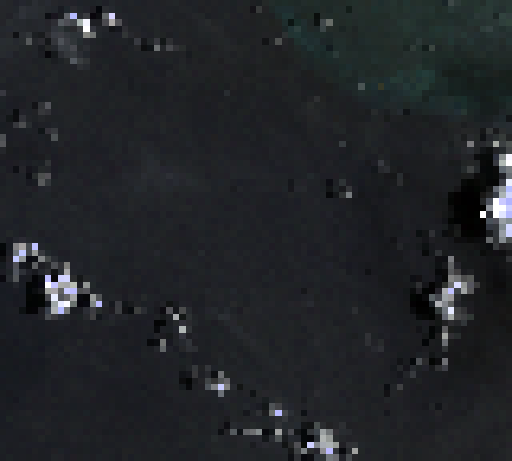

In [21]:
chunk0 = rs.crop(list_of_regions[17])
chunk0

In [22]:
import dask.multiprocessing
from dask.delayed import delayed
from dask.base import compute

def worker(raster_filename, roi):
    raster = tl.GeoRaster2.open(raster_filename) #Lazy loading of the raster
    chunk0 = raster.crop(roi)
    return chunk0.image.max()

RASTER_URL="https://github.com/mapbox/rasterio/raw/master/tests/data/rgb_deflate.tif"
items = [delayed(worker)(RASTER_URL, roi) for roi in list_of_regions]

maxs = compute(*items, get=dask.multiprocessing.get)

# 4. Uso interno en Satellogic

* Visualizar capturas y trazas de nuestros sat√©lites
* Estimar la cobertura y hacer c√°lculos de √°rea
* Ingesti√≥n y manipulaci√≥n de datos geoespaciales a gran escala para Deep Learning

# 5. Trabajo futuro

* üêõ Lista de tareas https://github.com/satellogic/telluric/issues
* Mejor visualizaci√≥n (buen rendimiento para grandes vol√∫menes, m√°s interactividad)
* API a√∫n m√°s sencilla
* Mejor manejo de casos l√≠mite (antimeridiano, polos)
* M√°s operaciones geom√©tricas avanzadas (buffering geod√©sico, centroides)
* ...Sorpresas

# ¬øPreguntas?

* üïÆ http://telluric.readthedocs.io/
* üîß https://github.com/satellogic/telluric

![Final](img/final.png)